In [1]:
#This is a test jupyter notebook!

#Load modules
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from event_analysis import optimise_pss
import matplotlib
matplotlib.rcParams.update({"font.size":14})

In [2]:
#Get the thresholds for SCW event occurrence
#era5_hss, era5_wg10, barra_sta = optimise_pss("/g/data/eg3/ab4502/ExtremeWind/points/"+\
 #   "era5_allvars_2005_2018.pkl",\
  #  T=1000, compute=False, l_thresh=2, is_pss="hss", model_name="era5")

In [3]:
#Load ERA5 data

era_2016 = xr.open_dataset("/g/data/eg3/ab4502/ExtremeWind/aus/era5/era5_20160901_20160930.nc")
era_2008 = xr.open_dataset("/g/data/eg3/ab4502/ExtremeWind/aus/era5/era5_20081101_20081130.nc")
era_2015 = xr.open_dataset("/g/data/eg3/ab4502/ExtremeWind/aus/era5/era5_20151201_20151231.nc")

In [4]:
#Calculate the logistic model equation
logit_2016 = 1 / ( 1 + np.exp( -(6.4e-1 * era_2016["lr36"] - 1.2e-4 * era_2016["mhgt"] + 4.4e-4 * era_2016["ml_el"] - 1.0e-1 * era_2016["qmean01"] + 1.7e-2 * era_2016["srhe_left"] + 1.5e-1 * era_2016["Umean06"] - 7.4 ) ) )
logit_2008 = 1 / ( 1 + np.exp( -(6.4e-1 * era_2008["lr36"] - 1.2e-4 * era_2008["mhgt"] + 4.4e-4 * era_2008["ml_el"] - 1.0e-1 * era_2008["qmean01"] + 1.7e-2 * era_2008["srhe_left"] + 1.5e-1 * era_2008["Umean06"] - 7.4 ) ) )
logit_2015 = 1 / ( 1 + np.exp( -(6.4e-1 * era_2015["lr36"] - 1.2e-4 * era_2015["mhgt"] + 4.4e-4 * era_2015["ml_el"] - 1.0e-1 * era_2015["qmean01"] + 1.7e-2 * era_2015["srhe_left"] + 1.5e-1 * era_2015["Umean06"] - 7.4 ) ) )

era_2016 = era_2016.assign({"logit":logit_2016})
era_2008 = era_2008.assign({"logit":logit_2008})
era_2015 = era_2015.assign({"logit":logit_2015})

In [5]:
#Plotting lims
lims = {"logit":[0,1],"mlcape*s06":[0,100000], "dcp":[0,1], "t_totals":[40,55]}
thresh = {"logit":0.72, "mlcape*s06":5000, "dcp":0.03, "t_totals":48}
titles = {"logit":"a) Logistic model", "dcp":"b) DCP", "t_totals":"c) T-totals"}
vext = {"logit":"max", "dcp":"max", "t_totals":"both"}

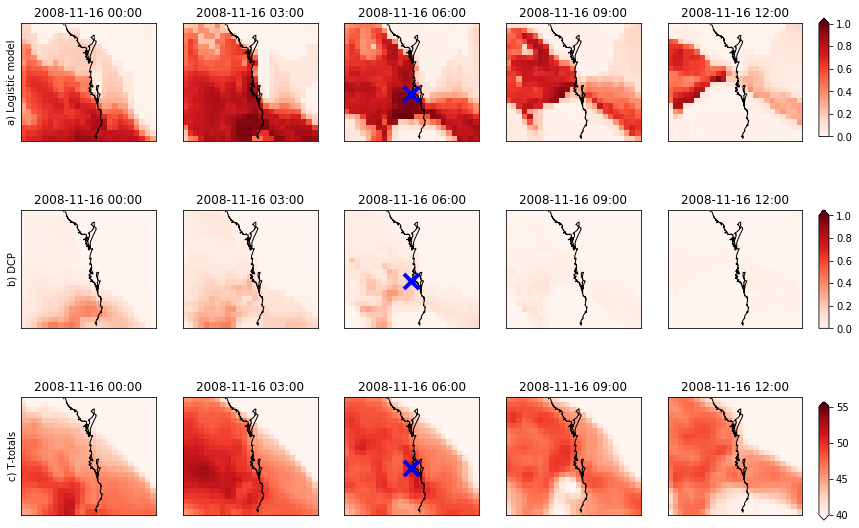

In [8]:
#Plot The Gap windstorm
lon = [150, 156]
lat = [-29.5, -24.2]
m = Basemap(llcrnrlon=lon[0], llcrnrlat=lat[0], urcrnrlon=lon[1], urcrnrlat=lat[1],projection="cyl",resolution="h")
temp = era_2008.sel({"lon":slice(lon[0],lon[1]), "lat":slice(lat[1], lat[0])})
x,y=np.meshgrid(temp.lon.values, temp.lat.values)

plt.figure(figsize=[14,10])
cnt=1
for v in ["logit","dcp", "t_totals"]:
    for t in ["2008-11-16 00:00", "2008-11-16 03:00","2008-11-16 06:00", "2008-11-16 09:00", "2008-11-16 12:00"]:
        ax = plt.subplot(3,5,cnt)
        if t == "2008-11-16 00:00":
            plt.ylabel(titles[v])
        m.drawcoastlines()
        if t == "2008-11-16 06:00":
                m.plot(152.9531, -27.4439, "x", color="blue", ms=15, mew=4)
        plt.title(t)
        c=temp.sel({'time':t})[v].plot(vmin=lims[v][0], vmax=lims[v][1], add_colorbar=False,add_labels=False,cmap=plt.get_cmap("Reds"))
        #m.contourf(x,y, np.where(temp.sel({'time':t})[v] >= thresh[v], 1, 0), levels=[.5,1.5], \
         #       colors=["none", "grey"], hatches=["///"], alpha=0)
        if t == "2008-11-16 12:00":
            cax = plt.axes([ax.get_position().x0+0.15, ax.get_position().y0, 0.01, ax.get_position().height])
            plt.colorbar(c,cax=cax,extend=vext[v])
        cnt = cnt+1
plt.subplots_adjust(hspace=0.1)


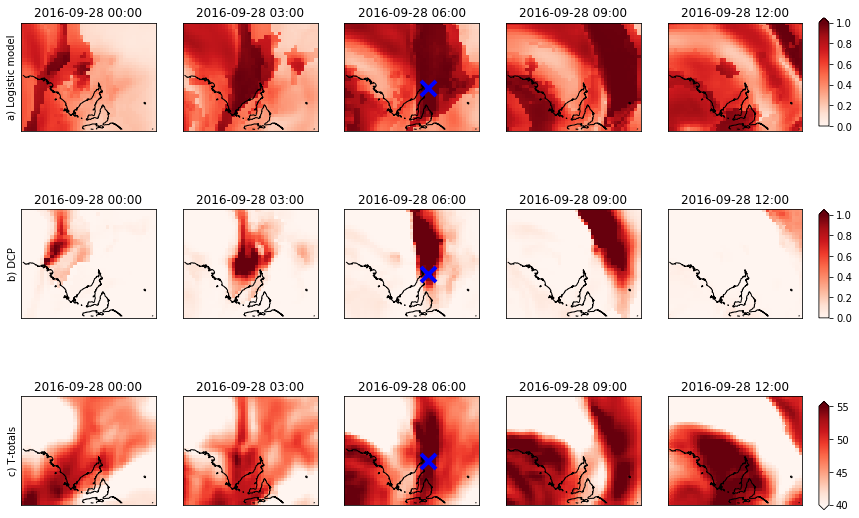

In [11]:
#Plot the System black event
lon = [132, 142]
lat = [-36, -28]
m = Basemap(llcrnrlon=lon[0], llcrnrlat=lat[0], urcrnrlon=lon[1], urcrnrlat=lat[1],projection="cyl",resolution="h")
temp = era_2016.sel({"lon":slice(lon[0],lon[1]), "lat":slice(lat[1], lat[0])})
x,y=np.meshgrid(temp.lon.values, temp.lat.values)


plt.figure(figsize=[14,10])
cnt=1

for v in ["logit", "dcp", "t_totals"]:
    for t in ["2016-09-28 00:00", "2016-09-28 03:00","2016-09-28 06:00", "2016-09-28 09:00", "2016-09-28 12:00"]:
        ax=plt.subplot(3,5,cnt)
        if t == "2016-09-28 00:00":
            plt.ylabel(titles[v])
        m.drawcoastlines()
        if t == "2016-09-28 06:00":
            m.plot(138.225051, -32.820261,  "x", color="blue", ms=15, mew=4)
        plt.title(t)
        c=temp.sel({'time':t})[v].plot(vmin=lims[v][0], vmax=lims[v][1], add_colorbar=False,add_labels=False,cmap=plt.get_cmap("Reds"))
        #m.contourf(x,y, np.where(temp.sel({'time':t})[v] >= thresh[v], 1, 0), levels=[.5,1.5], \
         #       colors=["none", "grey"], hatches=["///"], alpha=0)
        if t == "2016-09-28 12:00":
            cax = plt.axes([ax.get_position().x0+0.15, ax.get_position().y0, 0.01, ax.get_position().height])
            plt.colorbar(c,cax=cax,extend=vext[v])
        cnt = cnt+1
plt.subplots_adjust(hspace=0.1)

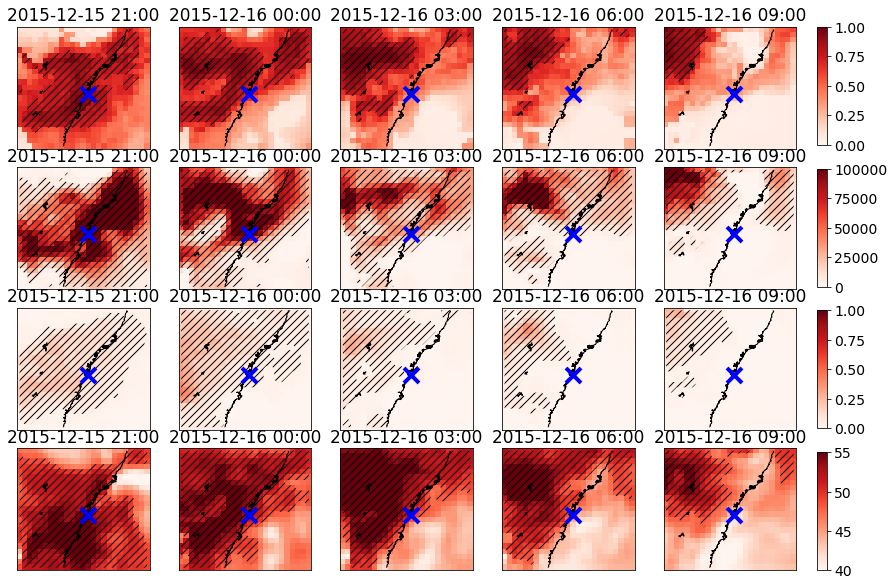

In [40]:
#Plot the Kurnell storm
lon = [148, 154]
lat = [-36.5, -31]
m = Basemap(llcrnrlon=lon[0], llcrnrlat=lat[0], urcrnrlon=lon[1], urcrnrlat=lat[1],projection="cyl",resolution="h")
temp = era_2015.sel({"lon":slice(lon[0],lon[1]), "lat":slice(lat[1], lat[0])})
x,y=np.meshgrid(temp.lon.values, temp.lat.values)


plt.figure(figsize=[14,10])
cnt=1
for v in ["logit","mlcape*s06", "dcp", "t_totals"]:
    for t in ["2015-12-15 21:00", "2015-12-16 00:00","2015-12-16 03:00", "2015-12-16 06:00", "2015-12-16 09:00"]:
        ax=plt.subplot(4,5,cnt)
        m.drawcoastlines()
        m.plot(151.210418, -34.022176,  "x", color="blue", ms=15, mew=4)
        plt.title(t)
        c=temp.sel({'time':t})[v].plot(vmin=lims[v][0], vmax=lims[v][1], add_colorbar=False,add_labels=False,cmap=plt.get_cmap("Reds"))
        m.contourf(x,y, np.where(temp.sel({'time':t})[v] >= thresh[v], 1, 0), levels=[.5,1.5], \
                colors=["none", "grey"], hatches=["///"], alpha=0)
        if t == "2015-12-16 09:00":
            cax = plt.axes([ax.get_position().x0+0.15, ax.get_position().y0, 0.01, ax.get_position().height])
            plt.colorbar(c,cax=cax)
        cnt = cnt+1
plt.subplots_adjust(hspace=0.15)